# Find out the age of Abalone from physical measurements

# About Dataset

# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# LOADING DATASET

In [2]:
df = pd.read_csv('C:\\Users\\HP\\Downloads\\abalone.csv')

In [3]:
df.head()#displaying first 5 records of dataset

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# DATA PREPROCESSING

In [4]:
df.isnull().sum()  #no null values in colums

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
df[df.isnull().any(axis=1)] #no null values along rows

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


In [6]:
data = pd.get_dummies(df,prefix_sep='_') # converting categorical data to numerical
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


# EXPLORATORY DATA ANALYSIS

In [7]:
#Checking out the the number of rows and columns in the dataframe
data.shape

(4177, 11)

In [8]:
#Checking out the datatypes of the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
 8   Sex_F           4177 non-null   uint8  
 9   Sex_I           4177 non-null   uint8  
 10  Sex_M           4177 non-null   uint8  
dtypes: float64(7), int64(1), uint8(3)
memory usage: 273.4 KB


In [9]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,0.312904,0.321283,0.365813
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,0.463731,0.467025,0.481715
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,1.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,1.000000,1.000000,1.000000


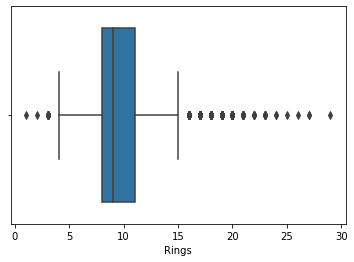

In [10]:
sns.boxplot(data['Rings']) #rings value ranges from 1-29

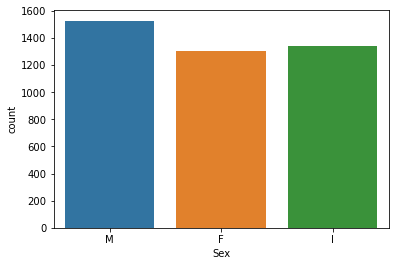

In [11]:
sns.countplot(df.Sex) #the dataset is balanced 

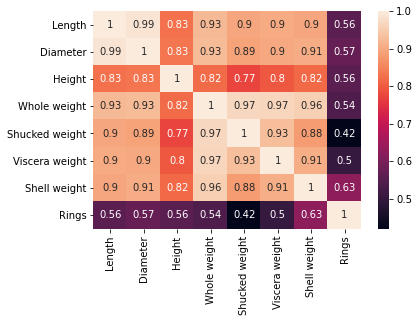

In [12]:
corr = df.corr()
sns.heatmap(corr, annot=True)  

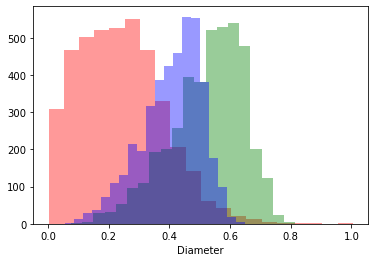

In [13]:
sns.distplot(df['Shell weight'], kde=False, bins=20, color='r')
sns.distplot(df['Length'], kde=False, bins=20, color='g')
sns.distplot(df['Diameter'], kde=False, bins=20, color='b')

In [14]:
#Assigning values to x and y
x = data.iloc[:, [0,1,2,3,4,5,6,8,9,10]].values
y= data.iloc[:,7].values

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)

# LINEAR REGRESSION MODEL

In [16]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
#for printing coefficient
print(regressor.coef_)
#for printing intercept
print (regressor.intercept_)

[ 8.82747983e-02  1.09983699e+01  7.65272707e+00  9.21259109e+00
 -2.03120166e+01 -1.06338861e+01  8.96035240e+00 -3.06623222e+12
 -3.06623222e+12 -3.06623222e+12]
3066232221047.68


# PREDICTION & EVALUATION

In [18]:
yp=regressor.predict(x_test)

In [19]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,yp))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,yp))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,yp)))

Mean Absolute Error: 1.567701480263158
Mean Squared Error: 4.80323968093361
Root Mean Squared Error: 2.1916294579453
